In [1]:
from math import sin, pi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# SIR model
def sir(x, t, beta, gamma):
    s,i,r = x
    
    dsdt = - beta * s * i
    didt = + beta * s * i - gamma * i
    drdt = + gamma * i
    
    return np.array([dsdt, didt, drdt])

# SIRS model with vaccination and seasonality
def sirs_vs(x, t, beta, gamma, alpha, zeta, xi):
    s,i,r = x
    
    _lambda = beta * (1 + xi * sin(pi*t/180))
    _eta    = zeta if s > zeta else s
    
    dsdt = - _lambda * s * i - _eta + alpha * r
    didt = + _lambda * s * i - gamma * i
    drdt = + gamma * i + _eta - alpha * r 
    
    return np.array([dsdt, didt, drdt])

In [3]:
def solve(model, x0, tspan, h, args):
    solution = np.empty(shape=(len(tspan), len(x0)))
    c = 0
    solution[c] = x0
    x = x0
    
    for t in tspan[1:]:
        c += 1
        dx = model(x, t, *args) * h
        x += dx
        solution[c] = x
    return solution.transpose()

In [4]:
def visualize(solution, n, tspan, args, labels):
    t_0, t_max = tspan[0], tspan[-1]
    beta, gamma = args[0], args[1]

    fig = plt.figure(figsize=(12,4), constrained_layout=True)
    spec = fig.add_gridspec(2,2, width_ratios=[2,1], height_ratios=[3,2])
    
    ax1 = fig.add_subplot(spec[0, 0])
    ax2 = fig.add_subplot(spec[1, 0])
    ax3 = fig.add_subplot(spec[:, 1])
    
    # compartment size time series
    c = 0
    for x in solution:
        ax1.plot(tspan, x, '-', label=labels[c])
        c += 1
    ax1.legend(loc='center right')
    ax1.set_xlim(t_0, t_max)
    ax1.set_ylim(0, 1)
    
    # effective reproductive number time series
    reprod = beta/gamma*solution[0]
    ax2.plot(tspan, reprod, 'k', label=r"$R_e$")
    ax2.plot([t_0, t_max], [1,1], 'k:')
    ax2.legend()
    ax2.set_xlim(t_0, t_max)
    
    # si phase plane
    ax3.plot(solution[0], solution[1], 'k')
    ax3.set_xlim(0, None)
    ax3.set_ylim(0, None)
    
    plt.show()

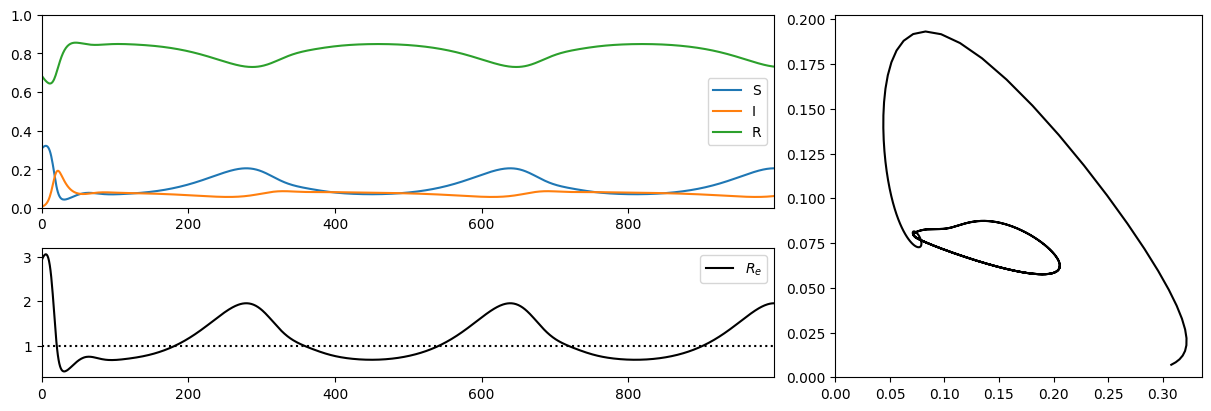

In [5]:
t = 0
d = 1000
h = 1
tspan = np.arange(t, t+d, h)

s0, i0, r0 = 0.308, 0.007, 0.685
n = 83e6
x0 = np.array([s0, i0, r0])
labels = ['S', 'I', 'R']

beta = 0.95
gamma = 1/10
alpha = 1/90
zeta = 0.0015
xi = 0.46
args = (beta, gamma, alpha, zeta, xi)

solution = solve(sirs_vs, x0, tspan, h, args)
visualize(solution, n, tspan, args, labels)